#### Imports

In [13]:
import pandas as pd
import numpy as np
import glob
import re

import seaborn as sns
sns.set_style('whitegrid')
import matplotlib.pyplot as plt


In [3]:
!ls Datasets/analysis

bias_mini_analysis.csv	      political_mini_analysis.csv
clickbait_mini_analysis.csv   reliable_mini_analysis.csv
conspiracy_mini_analysis.csv  rumor_mini_analysis.csv
fake_mini_analysis.csv	      satire_mini_analysis.csv
hate_mini_analysis.csv	      unknown_mini_analysis.csv
junksci_mini_analysis.csv     unreliable_mini_analysis.csv


In [4]:
dataset_path = 'Datasets/analysis/'
class Dataset(object):
    def __init__(self, name, pd):
        self.name = name
        self.pd = pd
datasets = []

csv_files = glob.glob(dataset_path +"*.csv")
print('Files :',len(csv_files))




Files : 12


#### Reading CSV Files

In [5]:
for file in csv_files:
    datasets.append(Dataset(file.replace(dataset_path,''), pd.DataFrame()))

for obj in datasets:
    obj.pd = pd.read_csv(dataset_path+obj.name)

In [6]:
for i in enumerate(datasets):
    print (i[0],' = ', i[1].name)
    i[1].pd.drop(columns = 'Unnamed: 0',inplace = True)
    match = re.match(r'[\w.]+_',i[1].name)
    i[1].pd['type'] = match.group()

0  =  rumor_mini_analysis.csv
1  =  fake_mini_analysis.csv
2  =  clickbait_mini_analysis.csv
3  =  hate_mini_analysis.csv
4  =  unreliable_mini_analysis.csv
5  =  reliable_mini_analysis.csv
6  =  unknown_mini_analysis.csv
7  =  junksci_mini_analysis.csv
8  =  satire_mini_analysis.csv
9  =  conspiracy_mini_analysis.csv
10  =  bias_mini_analysis.csv
11  =  political_mini_analysis.csv


#### Making a Single DataFrame 

In [7]:
df = pd.DataFrame(columns = ['Analytical', 'Anger', 'Confident', 'Fear', 'Joy', 'Sadness',
       'Tentative', 'id', 'type'] )
for dataframe in datasets:
    df = pd.concat([df,dataframe.pd], ignore_index=True)


In [8]:
df

,Analytical,Anger,Confident,Fear,Joy,Sadness,Tentative,id,type
0,0.000000,0.000000,0,0.601289,0.567424,0.000000,0.726298,1,rumor_mini_
1,0.505877,0.000000,0,0.000000,0.000000,0.000000,0.606057,2,rumor_mini_
2,0.652536,0.510506,0,0.621759,0.000000,0.514168,0.000000,3,rumor_mini_
3,0.000000,0.000000,0,0.000000,0.000000,0.591448,0.650502,4,rumor_mini_
4,0.000000,0.530576,0,0.000000,0.000000,0.545280,0.000000,5,rumor_mini_
5,0.000000,0.000000,0,0.574923,0.567841,0.566046,0.000000,6,rumor_mini_
6,0.000000,0.000000,0,0.000000,0.000000,0.671726,0.585856,7,rumor_mini_
7,0.000000,0.000000,0,0.000000,0.515332,0.550635,0.570829,8,rumor_mini_
8,0.708431,0.517673,0,0.000000,0.000000,0.596031,0.710804,9,rumor_mini_
9,0.000000,0.000000,0,0.000000,0.579806,0.000000,0.000000,10,rumor_mini_


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120 entries, 0 to 119
Data columns (total 9 columns):
Analytical    120 non-null float64
Anger         120 non-null float64
Confident     120 non-null object
Fear          120 non-null float64
Joy           120 non-null float64
Sadness       120 non-null float64
Tentative     120 non-null float64
id            120 non-null object
type          120 non-null object
dtypes: float64(6), object(3)
memory usage: 8.5+ KB


#### Different Tones Counts

In [10]:
print('Unique Counts:\nAnalytical:{}\nAnger:{}\nConfident:{}\nFear:{}\
        \nJoy:{}\nSadness:{}\nTentative:{}\n'.format(df.Analytical.nunique(),\
                                                    df.Anger.nunique(),\
                                                    df.Confident.nunique(),\
                                                    df.Fear.nunique(),\
                                                    df.Joy.nunique(),\
                                                    df.Sadness.nunique(),\
                                                    df.Tentative.nunique(),))

Unique Counts:
Analytical:83
Anger:11
Confident:10
Fear:14        
Joy:63
Sadness:60
Tentative:50



#### DataFrame for Graphs

In [11]:
def p(x):
    return (x*100)

Df = df.drop(columns=['id','type']).applymap(p)

Df['Type'] = df['type']

In [ ]:
Df

#### Graphs 

/home/sourabh/anaconda3/envs/py36/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


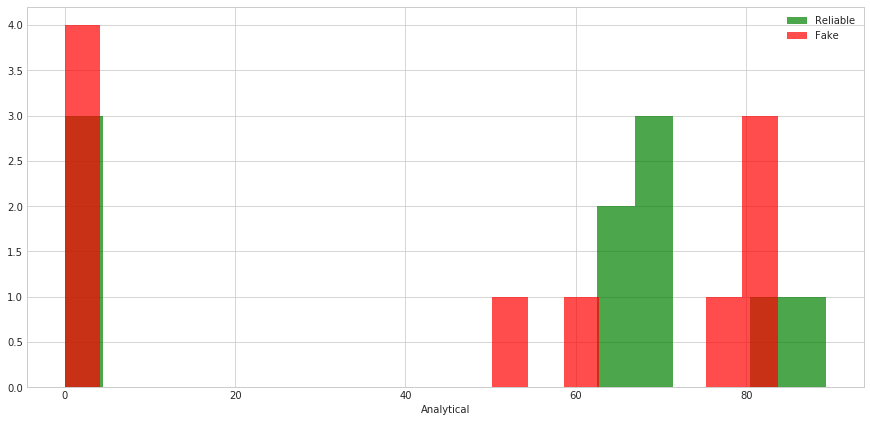

In [14]:
plt.figure(figsize = (15,7))
sns.distplot(Df[Df['Type'] == 'reliable_mini_']['Analytical'], kde = False,hist_kws={'alpha':.7},label = 'Reliable',color='green',bins = 20)
sns.distplot(Df[Df['Type'] == 'fake_mini_']['Analytical'], kde = False,hist_kws={'alpha':.7},label = 'Fake',color = 'red',bins = 20)
plt.legend()

#### Analytical

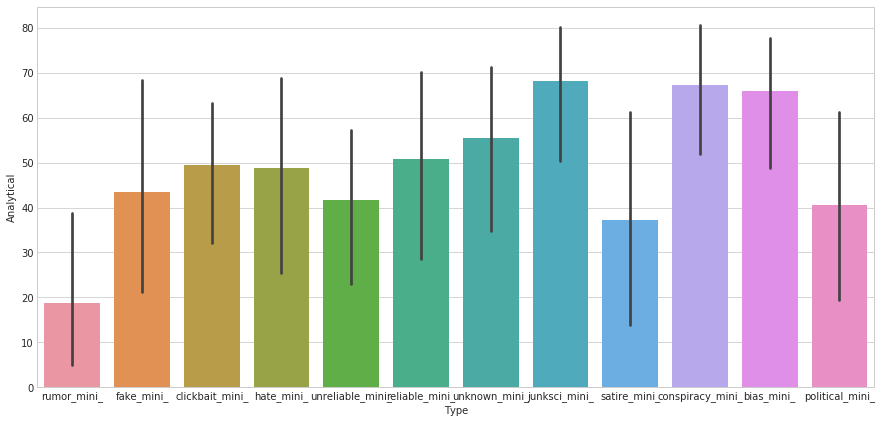

In [15]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Type', y = 'Analytical', data = Df)

#### Anger

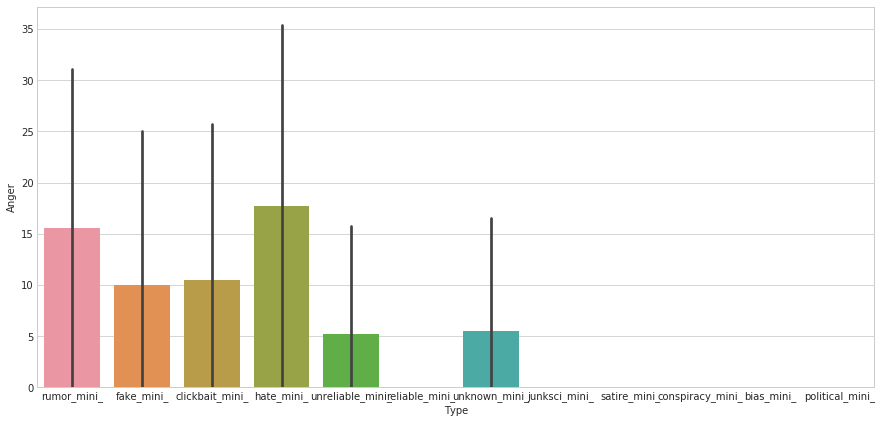

In [16]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Type', y = 'Anger', data = Df)

#### Confident

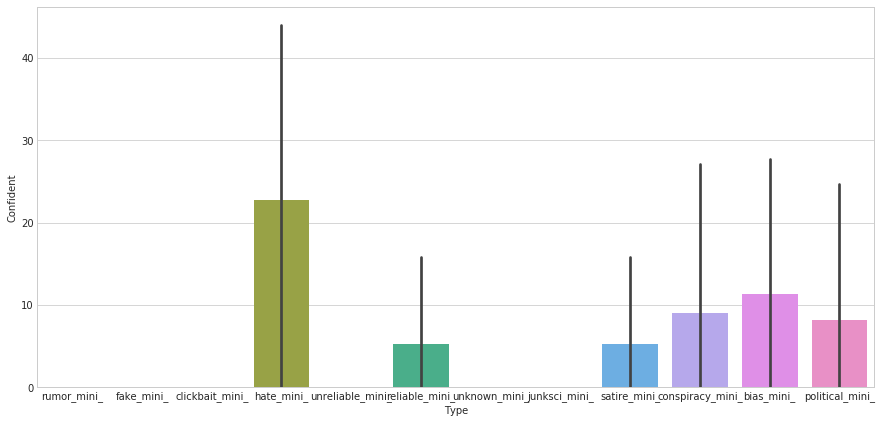

In [17]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Type', y = 'Confident', data = Df)

#### Fear

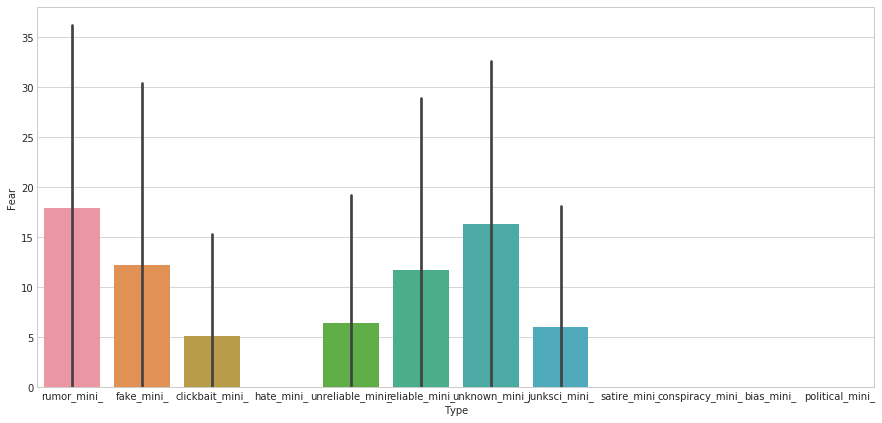

In [18]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Type', y = 'Fear', data = Df)

#### Sadness

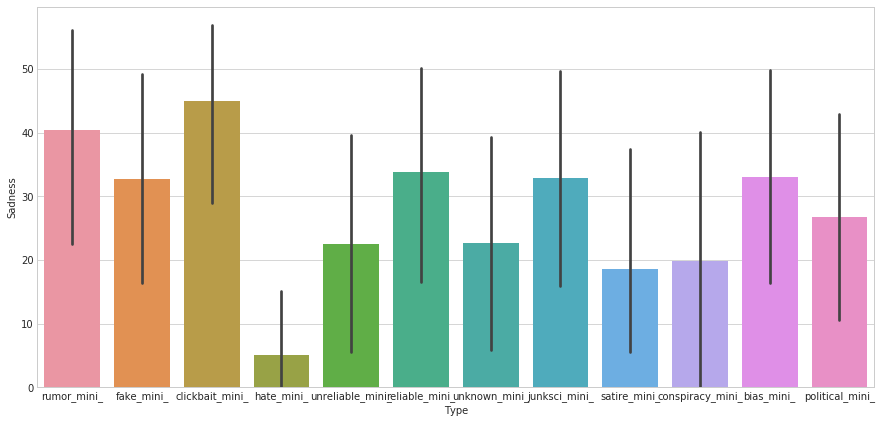

In [19]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Type', y = 'Sadness', data = Df)

#### Tentative

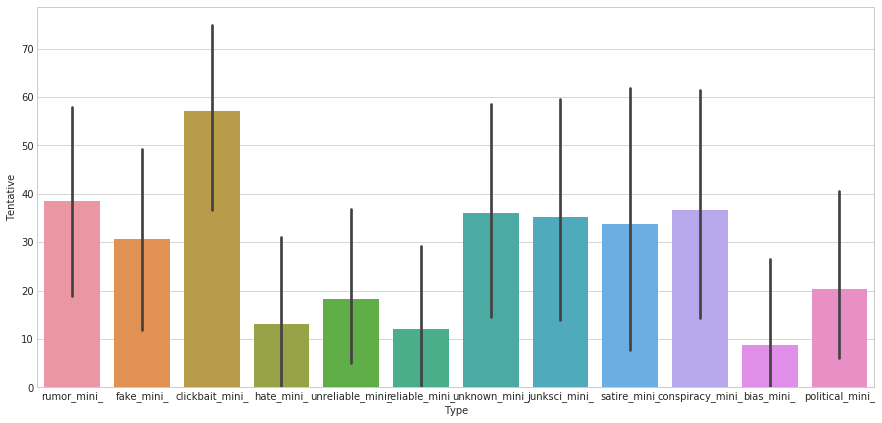

In [20]:
plt.figure(figsize = (15,7))
sns.barplot(x = 'Type', y = 'Tentative', data = Df)

In [ ]:
x = Df[DF['Type'] == 'rumor_min']